# ChatGPT Chat Log
https://chatgpt.com/share/674006c2-0ef0-8011-be16-7e56aa27c75c

In [11]:
# Question 3

import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove 'Weight_oz', 'Width', 'Height'
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Step 2: Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Step 5: Initial EDA and summary statistics
eda_summary = ab_reduced_noNaN.describe()
info = ab_reduced_noNaN.info()

# Preview the first few rows
head = ab_reduced_noNaN.head()

eda_summary, info, head


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB


(       List Price  Amazon Price    NumPages     Pub year       Thick
 count  319.000000    319.000000  319.000000   319.000000  319.000000
 mean    18.362978     12.941034  334.272727  2002.175549    0.903448
 std     13.976755     12.436673  161.601510    10.646133    0.365261
 min      1.500000      0.770000   24.000000  1936.000000    0.100000
 25%     13.890000      8.600000  208.000000  1998.000000    0.600000
 50%     15.000000     10.200000  320.000000  2005.000000    0.900000
 75%     19.360000     12.560000  416.000000  2010.000000    1.100000
 max    139.950000    139.950000  896.000000  2011.000000    2.100000,
 None,
                                                Title           Author  \
 0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
 1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
 2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
 3            1421: The Year China Discovered America    Gavin Men

In [12]:
# Question 4

from sklearn.model_selection import train_test_split

# Perform an 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations in each set
num_train = ab_reduced_noNaN_train.shape[0]
num_test = ab_reduced_noNaN_test.shape[0]

num_train, num_test

(255, 64)

In [13]:
# Question 4

from sklearn.tree import DecisionTreeClassifier

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Step 1: Initialize the classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Step 2: Fit the classifier on the training data
clf.fit(X, y)

# Model is now trained. Display the tree structure or check the feature importance
print("Model trained successfully.")

Model trained successfully.


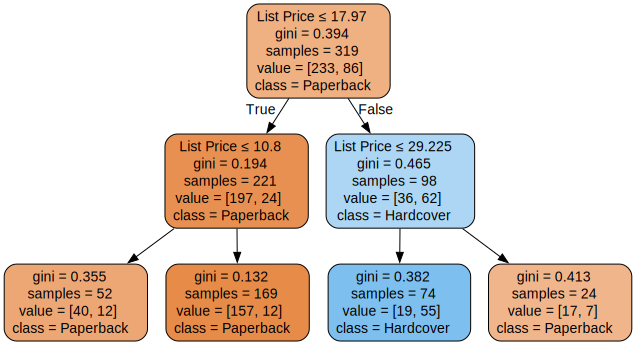

In [14]:
# Question 4 (add on)

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

# Export the decision tree to DOT format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=['List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True,
    rounded=True,
    special_characters=True,
)

# Visualize the tree
graph = graphviz.Source(dot_data)
display(graph)

In [15]:
# Question 5

# Step 1: Define the new feature matrix
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Step 2: Initialize the Decision Tree Classifier with max_depth=4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Step 3: Train the classifier
clf.fit(X, y)

print("Decision Tree trained successfully with max_depth=4.")

Decision Tree trained successfully with max_depth=4.


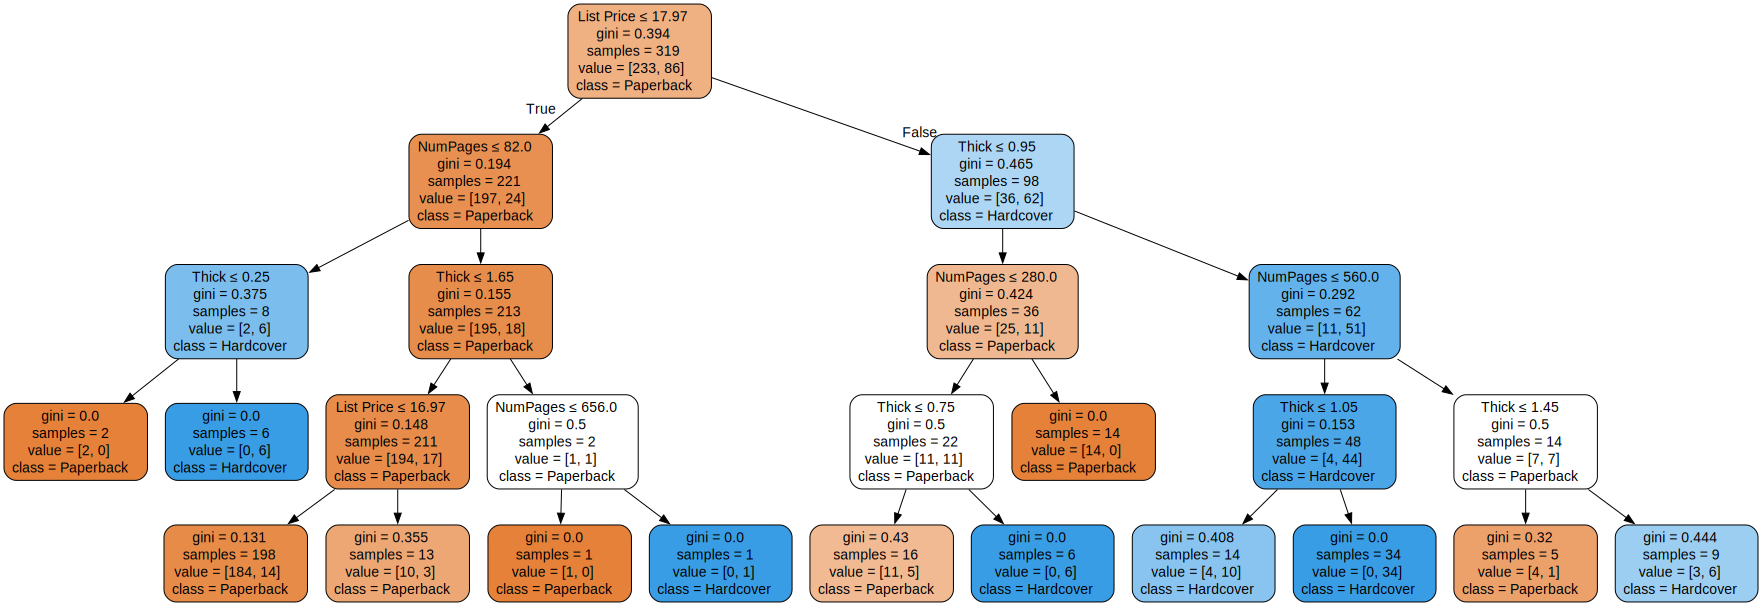

In [16]:
# Question 5 (add on)

# Export the decision tree structure
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True,
    rounded=True,
    special_characters=True,
)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
display(graph)

In [18]:
# Question 6

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Separate features (X_test) and target (y_test) for the test set
X_test_clf = ab_reduced_noNaN_test[['List Price']]  # Features for clf
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Features for clf2
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Step 2: Make predictions using clf and clf2
y_pred_clf = clf.predict(X_test_clf)  # Prediction for clf
y_pred_clf2 = clf2.predict(X_test_clf2)  # Prediction for clf2 (correct model)

# Step 3: Compute confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Step 4: Define metrics for sensitivity, specificity, and accuracy
def compute_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)  # True Positive Rate
    specificity = tn / (tn + fp)  # True Negative Rate
    accuracy = (tp + tn) / (tp + tn + fp + fn)  # Overall Accuracy
    return sensitivity, specificity, accuracy

# Compute metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = compute_metrics(cm_clf)

# Compute metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = compute_metrics(cm_clf2)

# Step 5: Display the confusion matrices
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot()
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot()

# Report metrics
print("Metrics for clf (List Price only):")
print(f"Sensitivity: {sensitivity_clf:.2f}, Specificity: {specificity_clf:.2f}, Accuracy: {accuracy_clf:.2f}")

print("\nMetrics for clf2 (NumPages, Thick, List Price):")
print(f"Sensitivity: {sensitivity_clf2:.2f}, Specificity: {specificity_clf2:.2f}, Accuracy: {accuracy_clf2:.2f}")

# Not sure how to fix this error

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- NumPages
- Thick


# Question 7
The first model (clf) was only trained using the List Price feature. The second model tries to make predictions for clf using features like NumPages, Thick, and List Price which it was never trained on. Since the algorithm does not have the data to make this prediction, it is invalid. The original clf and clf2 are better because they align the features used for prediction to the features used during the training.

# Question 8
I did this earlier in question 4 and 5.

# Question 9
Linear regression coefficients are a direct linear relationship of how the features can predict an outcome. They have clear interpretable magnitude and direction. In decision trees, we can interpret the importance of each individual feature and their relative contribution to the prediction. This makes it harder to quantify the effect of a single feature but it will reduce impurity across the tree.